In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [9]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
df.drop(['Address'], axis=1, inplace=True)

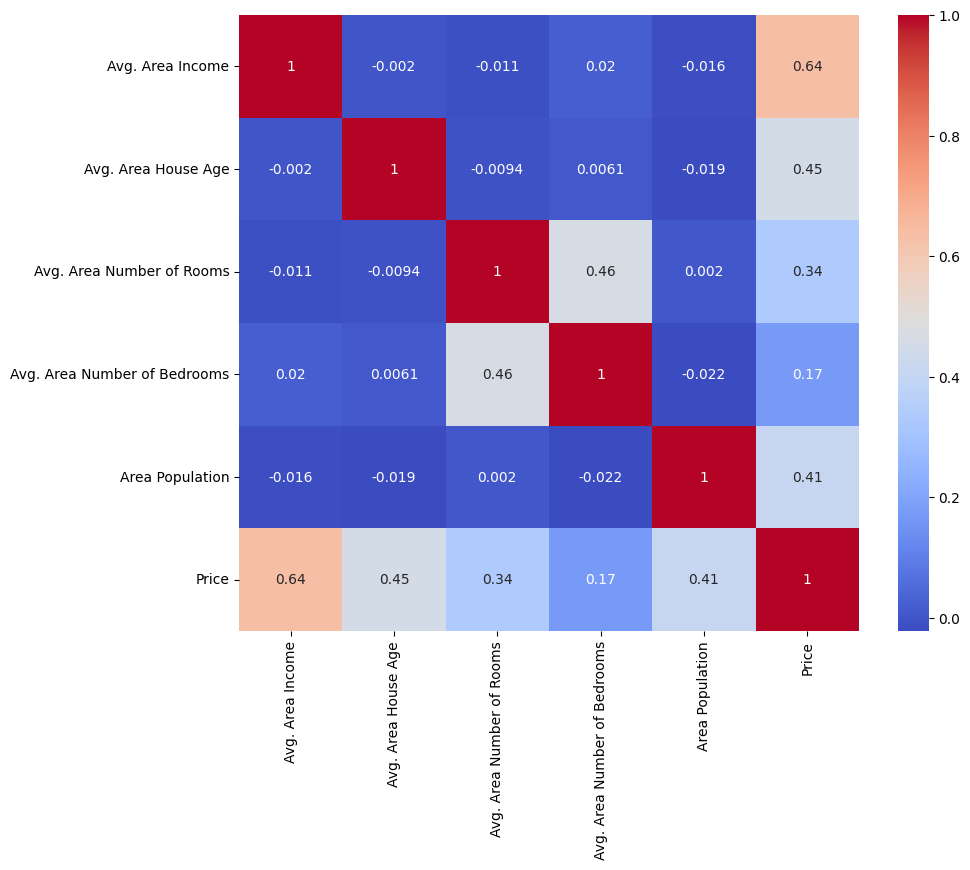

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

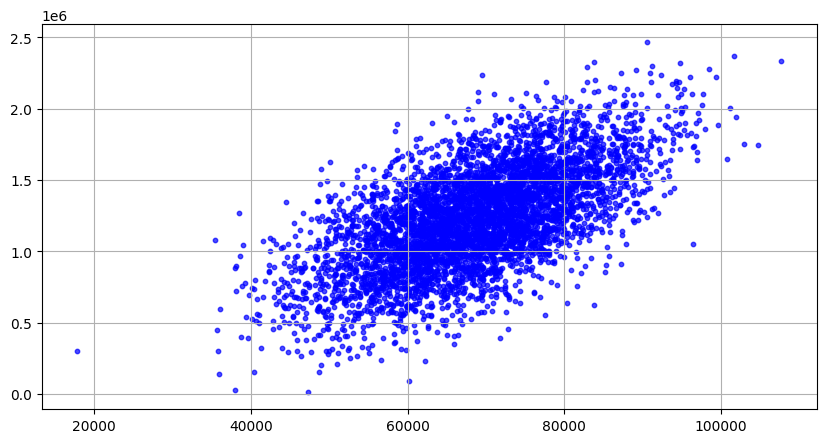

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(df['Avg. Area Income'],df['Price'],color='blue',s=10,alpha=0.7)
plt.grid(True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression

X = df.drop('Price', axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [16]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9179971706834289
MSE: 10089009300.894518


In [17]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 486.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [19]:
%%writefile app.py
import streamlit as st

Overwriting app.py


In [20]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [38]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

st.title('USA Housing Price Prediction')


df = pd.read_csv('USA_Housing.csv')
df.drop(['Address'], axis=1, inplace=True)
X = df.drop('Price', axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

avg_area_income = st.number_input('Avg. Area Income',min_value= 17796.631190, max_value=107701.748378, value=float(df['Avg. Area Income'].mean()))
avg_area_house_age = st.number_input('Avg. Area House Age',min_value=float(df['Avg. Area House Age'].min()) , max_value= float(df['Avg. Area House Age'].max()), value=float(df['Avg. Area House Age'].mean()))
avg_area_number_of_rooms = st.number_input('Avg. Area Number of Rooms',min_value=float(df['Avg. Area Number of Rooms'].min()) , max_value=float(df['Avg. Area Number of Rooms'].max()) , value=float(df['Avg. Area Number of Rooms'].mean()))
avg_area_number_of_bedrooms = st.number_input('Avg. Area Number of Bedrooms',min_value=float(df['Avg. Area Number of Bedrooms'].min()), max_value=float(df['Avg. Area Number of Bedrooms'].max()),value=float(df['Avg. Area Number of Bedrooms'].mean()))
area_population = st.number_input('Area Population',min_value =float(df['Area Population'].min()), max_value=float(df['Area Population'].max()),value=float(df['Area Population'].mean()))

if st.button('Predict Price'):

    input_data = pd.DataFrame({
        'Avg. Area Income': [avg_area_income],
        'Avg. Area House Age': [avg_area_house_age],
        'Avg. Area Number of Rooms': [avg_area_number_of_rooms],
        'Avg. Area Number of Bedrooms': [avg_area_number_of_bedrooms],
        'Area Population': [area_population]
    })


    prediction = model.predict(input_data)

    st.write(f'Predicted House Price: ${prediction[0]:,.2f}')

Overwriting app.py


In [43]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

35.229.236.66


In [ ]:
!npx localtunnel --port 8501 --allow-uncork

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://floppy-chefs-joke.loca.lt
